In [350]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read csv file
cases = pd.read_csv("311_Cases.csv", sep = ",", dtype = "str")

# Drop extra columns
cases = cases.drop(cases.columns[range(20,47)], axis = 1)



####### Date Columns #####
date_columns = ["Opened", "Closed", "Updated"]

# Convert specified columns into datetime format
cases[date_columns] = cases[date_columns].apply(pd.to_datetime, format = "%m/%d/%Y %I:%M:%S %p")

# Find Closed - Opened in hours
time_elapsed = (cases["Closed"] - cases["Opened"])/np.timedelta64(1, 'h')

# Insert Time Elapsed into cases df
cases.insert(3, "Time Elapsed", time_elapsed)

cases = cases.dropna()

cases

,CaseID,Opened,Closed,Time Elapsed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,...,Address,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
5,11866505,2019-12-27 12:06:55,2020-05-15 10:23:01,3358.268333,2020-05-15 10:23:01,Closed,Case Resolved - case is resolved,DPT SignShop Queue,Sign Repair,Sign - Faded,...,"174 NAGLEE AVE, SAN FRANCISCO, CA, 94112",NAGLEE AVE,11,Outer Mission,INGLESIDE,37.712975,-122.447778333333,"(37.712975, -122.44777833)",Mobile/Open311,http://mobile311.sfgov.org/reports/11866505/ph...
7,11866514,2019-12-27 12:08:15,2019-12-27 15:00:48,2.875833,2019-12-27 15:00:48,Closed,Case Resolved - WASTE NOT FOUND,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,...,"3101 17TH ST, SAN FRANCISCO, CA, 94110",17TH ST,9,Mission,MISSION,37.7636884,-122.4152514,"(37.7636884, -122.4152514)",Mobile/Open311,http://mobile311.sfgov.org/reports/11866514/ph...
8,11866507,2019-12-27 12:07:17,2019-12-27 22:15:58,10.144722,2019-12-27 22:15:58,Closed,Case is a Duplicate - Request is a duplicate a...,DPW Ops Queue,Graffiti,Graffiti on Fire_Police_Callbox,...,Intersection of ELLINGTON AVE and NAGLEE AVE,ELLINGTON AVE,11,Outer Mission,INGLESIDE,37.71222,-122.446853333333,"(37.71222, -122.44685333)",Mobile/Open311,http://mobile311.sfgov.org/reports/11866507/ph...
10,11866530,2019-12-27 12:10:00,2020-05-15 09:31:24,3357.356667,2020-05-15 09:31:24,Closed,Case Resolved - not missing tree it is a lands...,DPW Ops Queue,Tree Maintenance,Trees - Tree_Other,...,"118 DOLORES ST, SAN FRANCISCO, CA, 94103",DOLORES ST,8,Mission Dolores,MISSION,37.767568034096,-122.426817717513,"(37.76756803, -122.42681772)",Mobile/Open311,http://mobile311.sfgov.org/reports/11866530/ph...
12,11866573,2019-12-27 12:17:00,2019-12-27 13:11:00,0.900000,2019-12-27 13:11:00,Closed,Case Resolved,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,...,"601 CAPP ST, SAN FRANCISCO, CA, 94110",CAPP ST,9,Mission,MISSION,37.757046161285,-122.417728823098,"(37.75704616, -122.41772882)",Mobile/Open311,http://mobile311.sfgov.org/reports/11866573/ph...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,12651171,2020-07-15 07:21:41,2020-07-15 15:57:45,8.601111,2020-07-15 15:57:45,Closed,Case Resolved - Pickup completed.,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,...,"348 LEXINGTON ST, SAN FRANCISCO, CA, 94110",LEXINGTON ST,9,Mission,MISSION,37.757740757459,-122.42053910813,"(37.75774076, -122.42053911)",Mobile/Open311,http://mobile311.sfgov.org/reports/12651171/ph...
1991,12651169,2020-07-15 07:21:00,2020-07-15 14:42:02,7.350556,2020-07-15 14:42:02,Closed,Case Resolved - Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,...,"3248 21ST ST, SAN FRANCISCO, CA, 94110",21ST ST,9,Mission,MISSION,37.757103905785,-122.419986156638,"(37.75710391, -122.41998616)",Mobile/Open311,http://mobile311.sfgov.org/reports/12651169/ph...
1992,12651166,2020-07-15 07:20:00,2020-07-15 12:17:00,4.950000,2020-07-15 12:17:00,Closed,Case Resolved,DPW Ops Queue,Street and Sidewalk Cleaning,Medical Waste,...,"347 CASTRO ST, SAN FRANCISCO, CA, 94114 (Virtual)",CASTRO ST,8,Duboce Triangle,PARK,37.763192994702,-122.43513369804,"(37.76319299, -122.4351337)",Mobile/Open311,http://mobile311.sfgov.org/reports/12651166/ph...
1994,12311667,2020-04-10 15:54:00,2020-04-11 12:03:04,20.151111,2020-04-11 12:03:04,Closed,Case Resolved,DPW Ops Queue,Graffiti,Graffiti on Sidewalk_in_front_of_property,...,"2177 MARKET ST, SAN FRANCISCO, CA, 94114",MARKET ST,8,Mission Dolores,MISSION,37.766196089287,-122.430293879886,"(37.76619609, -122.43029388)",Mobile/Open311,http://mobile311.sfgov.org/reports/12311667/ph...


In [351]:
#Q4. Predict how long it takes for cases to be closed based on category of case
cases_q4 = cases.drop(cases.columns[range(11,20)], axis = 1)
cases_q4 = cases_q4.drop(['CaseID', 'Status Notes', 'Responsible Agency', 'Request Details', 'Media URL', 'Request Type'], axis = 1)
cases_q4

,Opened,Closed,Time Elapsed,Updated,Status,Category
5,2019-12-27 12:06:55,2020-05-15 10:23:01,3358.268333,2020-05-15 10:23:01,Closed,Sign Repair
7,2019-12-27 12:08:15,2019-12-27 15:00:48,2.875833,2019-12-27 15:00:48,Closed,Street and Sidewalk Cleaning
8,2019-12-27 12:07:17,2019-12-27 22:15:58,10.144722,2019-12-27 22:15:58,Closed,Graffiti
10,2019-12-27 12:10:00,2020-05-15 09:31:24,3357.356667,2020-05-15 09:31:24,Closed,Tree Maintenance
12,2019-12-27 12:17:00,2019-12-27 13:11:00,0.900000,2019-12-27 13:11:00,Closed,Street and Sidewalk Cleaning
...,...,...,...,...,...,...
1990,2020-07-15 07:21:41,2020-07-15 15:57:45,8.601111,2020-07-15 15:57:45,Closed,Street and Sidewalk Cleaning
1991,2020-07-15 07:21:00,2020-07-15 14:42:02,7.350556,2020-07-15 14:42:02,Closed,Street and Sidewalk Cleaning
1992,2020-07-15 07:20:00,2020-07-15 12:17:00,4.950000,2020-07-15 12:17:00,Closed,Street and Sidewalk Cleaning
1994,2020-04-10 15:54:00,2020-04-11 12:03:04,20.151111,2020-04-11 12:03:04,Closed,Graffiti


In [352]:
#Get dummies
category = pd.get_dummies(cases_q4['Category'],drop_first=True)
cases_q4 = pd.concat([cases_q4,category,request],axis=1)
cases_q4 = cases_q4.drop(['Category', 'Closed', 'Opened', 'Updated', 'Status'], axis = 1)
cases_q4

,Time Elapsed,Blocked Street or SideWalk,Damaged Property,Encampments,General Request - MTA,General Request - PUBLIC WORKS,Graffiti,Illegal Postings,Parking Enforcement,Rec and Park Requests,...,Streetlight - Light_Flickering_On_Off,Streetlight - Other,Transit_shelter_platform,Trees - Damaged_Tree,Trees - Damaging_Property,Trees - Overgrown_Tree,Trees - Tree_Other,complaint,other,request_for_service
5,3358.268333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2.875833,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10.144722,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3357.356667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,0.900000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,8.601111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1991,7.350556,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1992,4.950000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994,20.151111,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [381]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas import Series
import math

In [415]:
X = cases_q4.loc[:,cases_q4.columns != 'Time Elapsed']
y = cases_q4['Time Elapsed']

In [416]:
#Splitting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [417]:
#Fitting a Ridge Model
modelRidge = Ridge(normalize = True)
modelRidge.fit(X_train,y_train)
predRidge = modelRidge.predict(X_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(X_train, y_train))
print('Test accuracy:', modelRidge.score(X_test, y_test))
print('')

Coefficient of each feature: [-2.67708116e+02 -2.04710556e+02 -1.89856392e+02  1.67635065e+00
 -2.37330844e+02  4.49400524e+02 -2.58128507e+02 -2.84068169e+02
  4.30595795e+00 -2.74909145e+02  9.75449901e+02  1.69114139e+03
  1.17875536e+03 -3.50309482e+02 -1.72166763e+02  3.61587913e+02
 -2.67708116e+02 -2.74091575e+02 -2.72653411e+02 -2.73588229e+02
 -2.46960404e+02 -1.81880549e+02  3.85385233e+03 -2.31331313e+02
 -1.69001414e+02 -2.05268070e+02 -8.98311531e+02 -2.73323440e+02
 -1.73720924e+02 -3.10149943e+02 -2.74909145e+02 -2.34989495e+02
 -4.08885665e+02  8.84124372e+02  7.80207001e+03 -6.21326168e+02
  4.13552289e+03 -6.37513774e+02 -4.96672805e+02 -2.77859976e+02
 -5.74919266e+02 -6.06957816e+02  0.00000000e+00 -5.91746324e+02
 -6.11465425e+02 -6.28389189e+02  1.04045348e+03 -6.14959898e+02
  8.85624426e+02 -4.86591120e+02 -2.25751436e+02 -2.25401643e+02
 -2.53681338e+02 -2.76545249e+02 -2.67357566e+02 -2.55409693e+02
 -2.30338302e+02 -7.32589988e+02 -2.74264236e+02 -3.62880406e

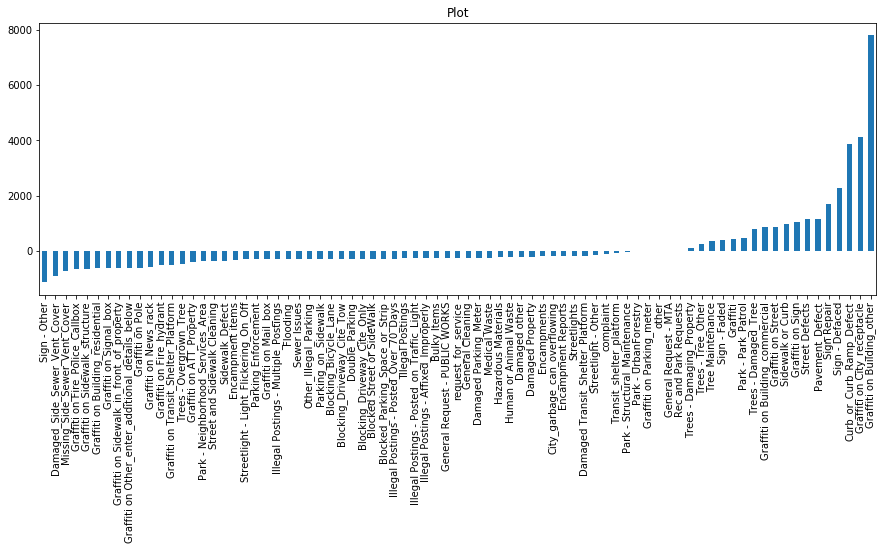

In [418]:
#Plot of variables vs coefficients
predictors = X_train.columns
coef = Series(modelRidge.coef_,predictors).sort_values()
plt.figure(figsize=(15,5))
plot = coef.plot(kind='bar', title = 'Plot')

In [ ]:
#Fitting a Ridge Model with box-cox


modelRidge = Ridge(normalize = True)
modelRidge.fit(X_train,y_train)
predRidge = modelRidge.predict(X_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(X_train, y_train))
print('Test accuracy:', modelRidge.score(X_test, y_test))
print('')

In [358]:

modelLasso = Lasso()
modelLasso.fit(X_train,y_train)
predLasso = modelLasso.predict(X_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(X_train, y_train))
print('Test accuracy:', modelLasso.score(X_test, y_test))
print('')

Coefficient of each feature: [   -0.            -0.             0.             0.
   -92.06925632     0.          -180.49702884  -248.96599377
    94.07411106    -0.           166.78593529  2401.21859214
  3487.13775154  -215.60297684     0.          1119.61938523
    -0.            -0.            -0.            -0.
   -25.84829321    38.64754379  8922.9370107     -0.
     0.            -0.            -0.            -0.
    24.2227826   -130.59798581    -0.            -0.
     0.          2712.55024785 16426.92833172  -127.20914648
  9124.64508712    -0.             0.           396.80126614
    -0.          -157.16837947     0.           -52.16951808
   -68.49853274    -0.          2372.80005322  -162.05052747
  2595.13721461     0.            -0.            -0.
    -0.            -0.            -0.            -0.
    -0.            -0.            -0.          -152.0225716
  1320.57763599   279.1995341      0.            -0.
   478.17038472   591.55902423  4332.23892933     0.
 -2161.

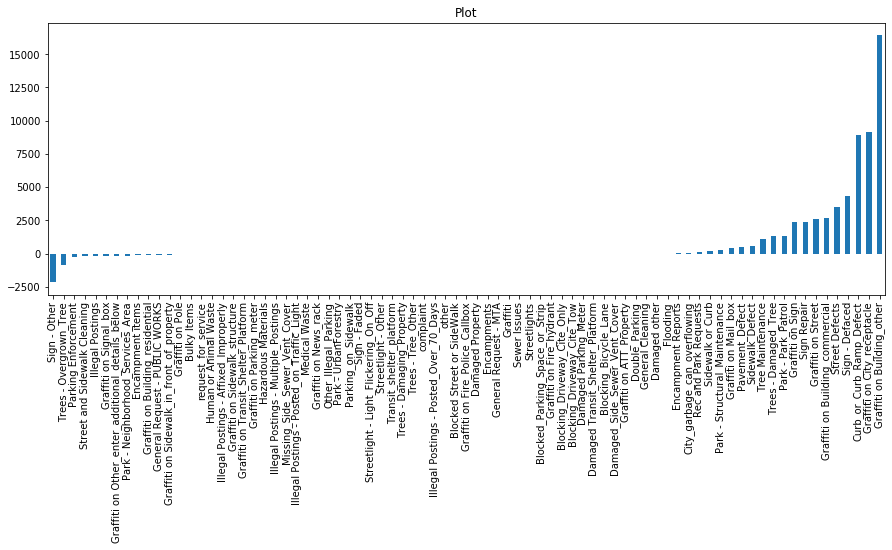

In [368]:
#Plot of variables vs coefficients
predictors = X_train.columns
coef = Series(modelLasso.coef_,predictors).sort_values()
plt.figure(figsize=(15,5))
plot = coef.plot(kind='bar', title = 'Plot')

In [447]:
cases_q7 = cases.drop(cases.columns[range(15,20)], axis = 1)
cases_q7 = cases_q7.drop(cases.columns[range(1,14)], axis = 1)
cases_q7 = cases_q7.drop(['Media URL', 'CaseID'], axis = 1)
cases_q7

,Neighborhood
5,Outer Mission
7,Mission
8,Outer Mission
10,Mission Dolores
12,Mission
...,...
1990,Mission
1991,Mission
1992,Duboce Triangle
1994,Mission Dolores


In [449]:
#grouping by neighborhood and obtaining frequency

cases_q7['freq'] = 1
neighborhood = cases_q7.groupby('Neighborhood').sum()['freq']
neighborhood = pd.DataFrame(neighborhood)
neighborhood = neighborhood.rename_axis("Neighborhood").reset_index()

In [450]:
#reading a csv file of household income and population
#from census.gov and niche.com
IncPop = pd.read_csv("Neighborhood.csv")
IncPop

#Combining both dataframes
neighborhood = pd.merge(neighborhood, IncPop, on = ["Neighborhood"])
neighborhood

,Neighborhood,freq,Income,Population
0,Alamo Square,3,239545,14570
1,Anza Vista,1,114431,3064
2,Apparel City,2,47826,2450
3,Aquatic Park / Ft. Mason,1,143693,3775
4,Aquatic Park / Ft. Mason,1,143693,3775
...,...,...,...,...
90,Upper Market,3,165929,8411
91,Visitacion Valley,11,79316,16890
92,West Portal,1,170018,5753
93,Western Addition,18,87765,20459


In [484]:
#CHECK VALS AGAIN
neighborhood['Pop Levels']  = pd.cut(neighborhood['Population'], bins=[0, 2000, 10000, 20000], include_lowest=True, labels=['low', 'mid', 'high'])
#CHECK VALS AGAIN
neighborhood['Income Levels']  = pd.cut(neighborhood['Income'], bins=[0, 50000, 100000, 300000], include_lowest=True, labels=['low', 'mid', 'high'])
neighborhood

,Neighborhood,freq,Income,Population,Income Levels,target,Pop Levels
0,Alamo Square,3,239545,14570,high,high,high
1,Anza Vista,1,114431,3064,high,mid,mid
2,Apparel City,2,47826,2450,low,mid,mid
3,Aquatic Park / Ft. Mason,1,143693,3775,high,mid,mid
4,Aquatic Park / Ft. Mason,1,143693,3775,high,mid,mid
...,...,...,...,...,...,...,...
90,Upper Market,3,165929,8411,high,mid,mid
91,Visitacion Valley,11,79316,16890,mid,high,high
92,West Portal,1,170018,5753,high,mid,mid
93,Western Addition,18,87765,20459,mid,NaN,NaN


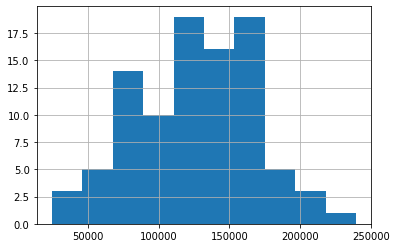

In [388]:
inc = neighborhood['Income'].hist()


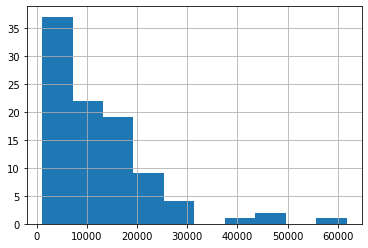

In [389]:
neighborhood['Population'].hist()

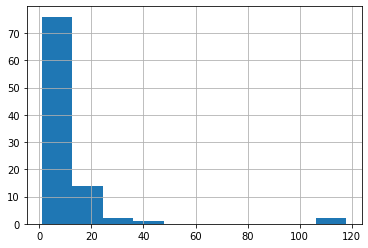

In [393]:
neighborhood['freq'].hist()

In [396]:
#Building Ridge Regression plots for frequency and income

Xinc = pd.DataFrame(neighborhood['Income'])
y = neighborhood['freq']

Xinc_train, Xinc_test, y_train, y_test = train_test_split(Xinc, y, test_size = 0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge(normalize = True)
modelRidge.fit(Xinc_train,y_train)
predRidge = modelRidge.predict(Xinc_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(Xinc_train, y_train))
print('Test accuracy:', modelRidge.score(Xinc_test, y_test))
print('')


Coefficient of each feature: [-2.80203964e-05]
Training accuracy: 0.003683130958082481
Test accuracy: -0.12085511781617742



In [398]:
#Looking at the accuracy


Coefficient of each feature: [-0.51825411]
Training accuracy: 0.0003238545512660451
Test accuracy: -0.1427354599625179



In [391]:
#Fitting a Lasso Model
modelLasso = Lasso()
modelLasso.fit(Xinc_train,y_train)
predLasso = modelLasso.predict(Xinc_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(Xinc_train, y_train))
print('Test accuracy:', modelLasso.score(Xinc_test, y_test))
print('')

Coefficient of each feature: [-2.83000689e-05]
Training accuracy: 0.003683492048053738
Test accuracy: -0.12094246187349844



In [404]:
#Building Ridge Regression plots for frequency and population

Xpop = pd.DataFrame(neighborhood['Population'])
y = neighborhood['freq']

Xpop_train, Xpop_test, y_train, y_test = train_test_split(Xpop, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(Xpop_train,y_train)
predRidge = modelRidge.predict(Xpop_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(Xpop_train, y_train))
print('Test accuracy:', modelRidge.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [0.00111659]
Training accuracy: 0.4099682765744494
Test accuracy: -0.579356077203456



In [405]:
neighborhood['logPop'] = np.log(neighborhood['Population'])
Xpop = pd.DataFrame(neighborhood['logPop'])
y = neighborhood['freq']

Xpop_train, Xpop_test, y_train, y_test = train_test_split(Xpop, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(Xpop_train,y_train)
predRidge = modelRidge.predict(Xpop_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(Xpop_train, y_train))
print('Test accuracy:', modelRidge.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [12.49236428]
Training accuracy: 0.2548177393850266
Test accuracy: -0.87399944351525



In [413]:
#log did worse so log10
neighborhood['expPop'] = np.sqrt(neighborhood['Population'])
Xpop = pd.DataFrame(neighborhood['expPop'])
y = neighborhood['freq']

Xpop_train, Xpop_test, y_train, y_test = train_test_split(Xpop, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(Xpop_train,y_train)
predRidge = modelRidge.predict(Xpop_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(Xpop_train, y_train))
print('Test accuracy:', modelRidge.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [0.27461754]
Training accuracy: 0.3518858250007297
Test accuracy: -0.9800455766525401



In [338]:
#Fitting a Lasso Model
modelLasso = Lasso()
modelLasso.fit(Xpop_train,y_train)
predLasso = modelLasso.predict(Xpop_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(Xpop_train, y_train))
print('Test accuracy:', modelLasso.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [0.00111658]
Training accuracy: 0.4099682765562792
Test accuracy: -24.49452813990781



In [408]:
neighborhood['logPop'] = np.log(neighborhood['Population'])
Xpop = pd.DataFrame(neighborhood['logPop'])
y = neighborhood['freq']

Xpop_train, Xpop_test, y_train, y_test = train_test_split(Xpop, y, test_size=0.3, random_state = 0)
modelLasso = Lasso()
modelLasso.fit(Xpop_train,y_train)
predLasso = modelLasso.predict(Xpop_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(Xpop_train, y_train))
print('Test accuracy:', modelLasso.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [11.22104438]
Training accuracy: 0.25112201373470133
Test accuracy: -0.6152212577967497



In [340]:
#Building Ridge Regression plots for frequency vs population and income
XIncPop = neighborhood[['Income', 'Population']]
y = neighborhood['freq']
XIncPop_train, XIncPop_test, y_train, y_test = train_test_split(XIncPop, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(XIncPop_train,y_train)
predRidge = modelRidge.predict(XIncPop_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(XIncPop_train, y_train))
print('Test accuracy:', modelRidge.score(XIncPop_test, y_test))
print('')


Coefficient of each feature: [1.34980773e-05 1.12360894e-03]
Training accuracy: 0.41078999684316575
Test accuracy: -24.373878774749397



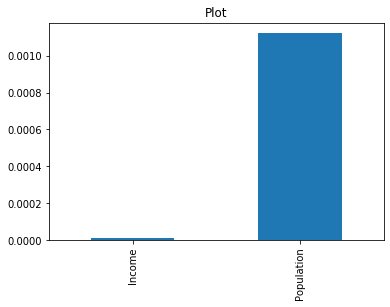

In [341]:
#Plot of variables vs coefficients
predictors = XIncPop_train.columns
coef = Series(modelRidge.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')

In [342]:
#Fitting a Lasso Model
modelLasso = Lasso()
modelLasso.fit(XIncPop_train,y_train)
predLasso = modelLasso.predict(XIncPop_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(XIncPop_train, y_train))
print('Test accuracy:', modelLasso.score(XIncPop_test, y_test))
print('')

Coefficient of each feature: [1.34972475e-05 1.12360108e-03]
Training accuracy: 0.4107899968218899
Test accuracy: -24.373557201879553



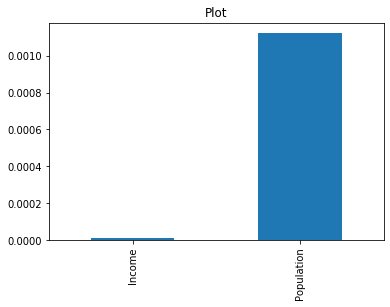

In [343]:
#Plot of variables vs coefficients
predictors = XIncPop_train.columns
coef = Series(modelLasso.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')

In [ ]:
#Split data into low, medium, high income and pop levels and plot pca
#freq and income, freq and pop, then freq and income + pop

,Neighborhood,freq,Income,Population,Income Levels,target,Pop Levels
0,Alamo Square,3,239545,14570,high,high,low
1,Anza Vista,1,114431,3064,high,high,low
2,Apparel City,2,47826,2450,low,low,low
3,Aquatic Park / Ft. Mason,1,143693,3775,high,high,low
4,Aquatic Park / Ft. Mason,1,143693,3775,high,high,low
...,...,...,...,...,...,...,...
90,Upper Market,3,165929,8411,high,high,low
91,Visitacion Valley,11,79316,16890,mid,mid,low
92,West Portal,1,170018,5753,high,high,low
93,Western Addition,18,87765,20459,mid,mid,low


In [459]:
#PCA of Income and frequency
df = neighborhood
neighborhood['target'] = neighborhood['Income Levels']
features = ['Income', 'freq']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [460]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x) ## transforming the data into PC coordinates.
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-2.125162,1.543220
1,-0.173472,-0.572519
2,0.950197,-1.614164
3,-0.649123,-0.096868
4,-0.649123,-0.096868
...,...,...
90,-0.928542,0.346600
91,0.807441,-0.733187
92,-1.077033,0.331042
93,0.957189,-0.308764


In [466]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-2.125162,1.543220,high
1,-0.173472,-0.572519,high
2,0.950197,-1.614164,low
3,-0.649123,-0.096868,high
4,-0.649123,-0.096868,high
...,...,...,...
90,-0.928542,0.346600,high
91,0.807441,-0.733187,mid
92,-1.077033,0.331042,high
93,0.957189,-0.308764,mid


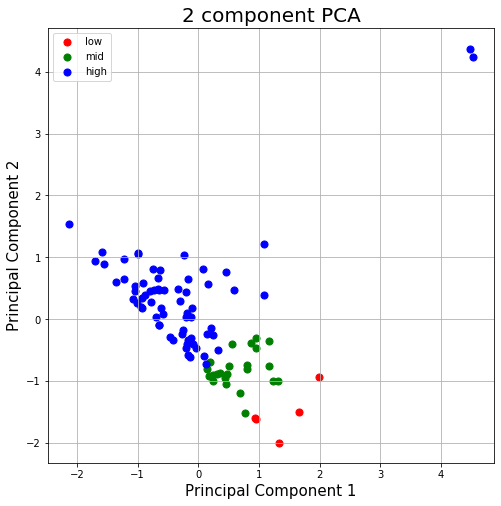

In [471]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low', 'mid', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [480]:
#PCA of Population and frequency
df = neighborhood
neighborhood['target'] = neighborhood['Pop Levels']
features = ['Population', 'freq']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [481]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x) ## transforming the data into PC coordinates.
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.160702,0.421240
1,-1.020540,-0.274550
2,-1.021035,-0.357069
3,-0.972476,-0.226486
4,-0.972476,-0.226486
...,...,...
90,-0.577055,0.004887
91,0.324229,0.249975
92,-0.838762,-0.092771
93,0.852582,0.204157


In [482]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-0.160702,0.421240,high
1,-1.020540,-0.274550,mid
2,-1.021035,-0.357069,mid
3,-0.972476,-0.226486,mid
4,-0.972476,-0.226486,mid
...,...,...,...
90,-0.577055,0.004887,mid
91,0.324229,0.249975,high
92,-0.838762,-0.092771,mid
93,0.852582,0.204157,NaN


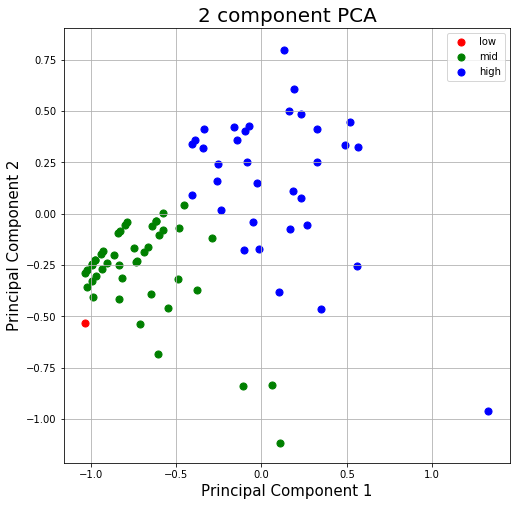

In [483]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low', 'mid', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()